---
                                            Московский Авиационный Институт  
                                      (Национальный Исследовательский Университет)  
        
                
                
    Кафедра 806 «Вычислительная математика и программирование»  
    Институт: «Информационные технологии и прикладная математика»  
    Дисциплина: «Разработка ПО для высокопроизводительных систем»        
                


                                            -------------------------------
                                            Лабораторная работа по Pandas №2  
                                            -------------------------------    
                                            
                                            
                                            
                                                                                Группа: М8О-103М-20  
                                                                                Студент: Винников Алексей Владимирович  
                                                                                Преподаватель: Поповкин Александр Викторович  
                                                                                
                                                                                
                                                                                
                                                     Москва, 2020  
                                                         
---

Получить от объекта Series показатели описательной статистики

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
ser1 = pd.Series([1,3,4,7])
ser1.describe()

count    4.00
mean     3.75
std      2.50
min      1.00
25%      2.50
50%      3.50
75%      4.75
max      7.00
dtype: float64

Узнать частоту уникальных элементов объекта Series (гистограмма)

[1 0 4 0 3 0 1 4 1 3 1 3 4 2 3 2 0 3 2 0 2 0 1 0 0 4 2 3 0 4 1 2 0 1 1 4 3
 3 2 1 4 1 0 2 1 3 3 1 2 1]


<BarContainer object of 5 artists>

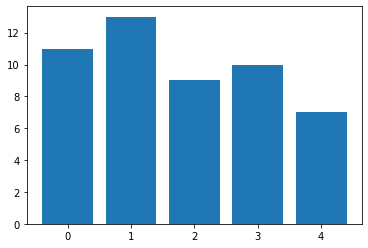

In [2]:
arr1 = np.random.randint(0,5,50)
ser2 = pd.Series(arr1)
 
freq = ser2.value_counts()
print(arr1)
plt.bar(freq.index, freq.values)

Заменить все элементы объекта Series на "Other", кроме двух наиболее часто встречающихся

In [3]:
arr2 = np.random.randint(0,5,20)
ser3 = pd.Series(arr2)

print(ser3.value_counts())
ser3[~ser3.isin(ser3.value_counts().index[:2])] = 'Other'
print(ser3)

0    7
3    6
1    5
4    2
dtype: int64
0         3
1         3
2         0
3     Other
4     Other
5     Other
6         3
7         3
8     Other
9         0
10    Other
11        0
12        0
13        0
14        3
15        0
16        0
17    Other
18    Other
19        3
dtype: object


Создать объект Series в индексах дата каждый день 2019 года, в значениях случайное значение

In [4]:
arr3_dates = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D')
ser4_dates = pd.Series(np.random.rand(len(arr3_dates)), index=arr3_dates)
ser4_dates

2018-01-01    0.153352
2018-01-02    0.091107
2018-01-03    0.011010
2018-01-04    0.461528
2018-01-05    0.640234
                ...   
2018-12-27    0.106889
2018-12-28    0.108908
2018-12-29    0.894257
2018-12-30    0.980395
2018-12-31    0.651940
Freq: D, Length: 365, dtype: float64

Найти сумму всех вторников

In [5]:
ser4_dates[ser4_dates.index.weekday == 2].sum()

27.584392735870942

Для каждого месяца найти среднее значение

In [6]:
ser4_dates.resample('M').mean()

2018-01-31    0.417278
2018-02-28    0.495538
2018-03-31    0.606974
2018-04-30    0.479643
2018-05-31    0.558108
2018-06-30    0.498005
2018-07-31    0.426208
2018-08-31    0.542994
2018-09-30    0.444909
2018-10-31    0.452841
2018-11-30    0.581978
2018-12-31    0.570223
Freq: M, dtype: float64

Преобразовать объект Series в DataFrame заданной формы (shape)

In [7]:
weight = 10
height = 11

ser5 = pd.Series(np.random.randint(0, 10, height*weight))    
df1 = pd.DataFrame(ser5.values.reshape(height, weight))
 
df1

,0,1,2,3,4,5,6,7,8,9
0,6,7,8,7,1,0,4,2,7,0
1,6,1,2,4,5,8,9,9,2,7
2,5,6,8,8,0,3,8,2,2,2
3,3,7,8,4,1,4,5,7,0,8
4,0,4,8,6,3,4,2,9,4,7
5,0,7,1,1,3,5,5,5,5,3
6,2,4,6,7,7,2,3,8,8,6
7,1,5,9,5,3,1,2,3,7,1
8,1,4,3,6,2,3,2,8,2,9
9,6,4,2,5,2,4,7,9,4,7


Найти индексы объекта Series кратные 3

In [8]:
ser5[(ser5 != 0) & (ser5 % 3 == 0)]

0      6
10     6
16     9
17     9
21     6
25     3
30     3
43     6
44     3
47     9
54     3
59     3
62     6
66     3
69     6
72     9
74     3
77     3
82     3
83     6
85     3
89     9
90     6
97     9
100    6
103    6
dtype: int32

Получить данные по индексам объекта Series

In [9]:
ser5[[8,11,90]]

8     7
11    1
90    6
dtype: int32

Объединить два объекта Series вертикально и горизонтально

In [10]:
ser5 = pd.Series([1, 2, 3])
ser6 = pd.Series([4, 5, 6])
df2 = pd.concat([ser5, ser6])
df3 = pd.concat([ser5, ser6], axis=1)
print(df2)
print(df3)

0    1
1    2
2    3
0    4
1    5
2    6
dtype: int64
   0  1
0  1  4
1  2  5
2  3  6


Получить индексы объекта Series A, данные которых содержатся в объетке Series B

In [11]:
ser7_a = pd.Series(np.arange(10));
ser7_b = pd.Series(np.arange(7)+1);
ser7_a[(ser7_a.isin(ser7_b))]

1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int32

Получить объект Series B, котоырй содержит элементы без повторений объекта A

In [12]:
ser8_a = ser7_a.append(pd.Series({10:9}))
ser8_b=ser8_a.unique()
ser8_b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

Преобразовать каждый символ объекта Series в верхний регистр

In [13]:
ser9 = pd.Series(['Pandas', 'lab', '5'])

pd.Series(word.upper() for word in ser9)

0    PANDAS
1       LAB
2         5
dtype: object

преобразовать данных Series в строку

In [14]:
ser9_with_num = pd.Series(['Pandas', 'lab', 5])
str_ser9 = pd.Series(str(word) for word in ser9_with_num)
str_ser9

0    Pandas
1       lab
2         5
dtype: object

Рассчитать количество символов в объекте Series

In [15]:
np.asarray(str_ser9.map(lambda x: len(x))).sum()

10

преобразовать в строковый тип

In [16]:
str_ser9

0    Pandas
1       lab
2         5
dtype: object

Найти разность между объектом Series и смещением объекта Series на n

In [17]:
n = 2
 
ser10 = pd.Series([1, 2, 3, 4, 5, 7, 12])
 
ser10.diff(periods=n)


0    NaN
1    NaN
2    2.0
3    2.0
4    2.0
5    3.0
6    7.0
dtype: float64

Преобразовать разыне форматы строк объекта Series в дату

In [18]:
ser11 = pd.Series(['2020/11/17', '2019-10-16', '15.09.18', '14 Aug 2017', '20160713'])
 
pd.to_datetime(ser11)

0   2020-11-17
1   2019-10-16
2   2018-09-15
3   2017-08-14
4   2016-07-13
dtype: datetime64[ns]

Поскольку работа с датой часто встречается в работе, то см. еще один пример
все данные должны иметь одинаковый формат (часто бывает выгрузка из SQL)

In [19]:
ser12 = pd.Series(['17.11.20', '16.10.19', '15.09.18', '14.08.17', '13.07.16'])

преобразовать в дату

In [20]:
pd.to_datetime(ser12, format="%d.%m.%y")

0   2020-11-17
1   2019-10-16
2   2018-09-15
3   2017-08-14
4   2016-07-13
dtype: datetime64[ns]

Получить год, месяц, день, день недели, номер дня в году от объекта Series (string):<br>
распарсить в дату и время

In [21]:
ser11_dates = pd.to_datetime(ser11)

получить года

In [22]:
ser11_dates.dt.year

0    2020
1    2019
2    2018
3    2017
4    2016
dtype: int64

получить месяца

In [23]:
ser11_dates.dt.month

0    11
1    10
2     9
3     8
4     7
dtype: int64

получить дни

In [24]:
ser11_dates.dt.day

0    17
1    16
2    15
3    14
4    13
dtype: int64

получить номер недели

In [25]:
ser11_dates.dt.isocalendar().week

0    47
1    42
2    37
3    33
4    28
Name: week, dtype: UInt32

получить номер дня в году

In [26]:
ser11_dates.dt.dayofyear

0    322
1    289
2    258
3    226
4    195
dtype: int64

Отобрать элементы объекта Series, кторые содержат не менее двух гласных

In [27]:
import re

ser13 = pd.Series(['Пятая', 'лаба', 'по', 'питону', 'Fifth', 'lab', 'on', 'Python'])

ser13[ser13.map(lambda word: bool(re.match('([^aeiouyаеёиооыэюя]*[aeiouyаеёиооыэюя]){2,}', word, re.I)))]

0     Пятая
1      лаба
3    питону
7    Python
dtype: object

Отобрать e-маилы из объекта Series (можно юзать регулярки)

In [33]:
ser14 = pd.Series(['wrong data', 'wrong\\121@ya.ru', 'use+%_.-r@example.com', 'alex@text.ru', 'wrong@email'])
ser14[ser14.map(lambda email: bool(re.match('[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}', email)))]

2    use+%_.-r@example.com
3             alex@text.ru
dtype: object

Получить среднее значение каждого уникального объекта Series s1 через "маску" другого объекта Series s2

In [29]:
n = 7
ser15 = pd.Series(np.random.choice(['one', 'two', 'three', 'four', 'five'], n))
ser16 = pd.Series(np.random.randint(1,5,n))
print(ser15)
print(ser16)
ser16.groupby(ser15).mean()

0     four
1      two
2      two
3      two
4      one
5      two
6    three
dtype: object
0    2
1    3
2    1
3    2
4    2
5    2
6    3
dtype: int32


four     2
one      2
three    3
two      2
dtype: int32